In [5]:
from IPython.display import display
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from math import pi
import numpy as np

sim = Aer.get_backend('aer_simulator')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

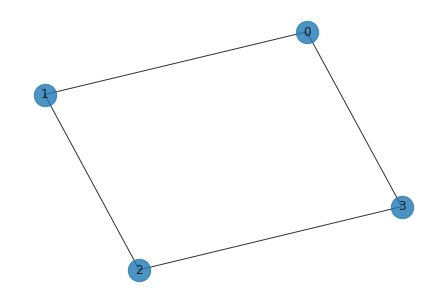

In [10]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
n = G.size()
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

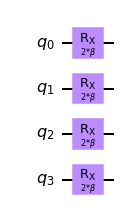

In [11]:
beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(n)
for i in range(0, n):
  qc_mix.rx(2 * beta, i)
qc_mix.draw()

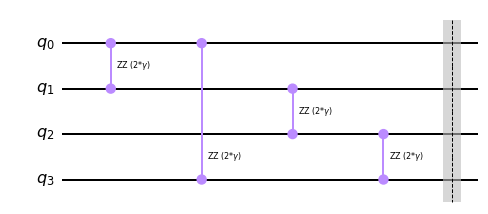

In [32]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(n)
for pair in G.edges():
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    #qc_p.barrier()
qc_p.barrier()
qc_p.draw()

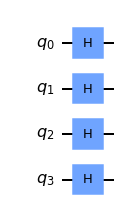

In [16]:
qc_0 = QuantumCircuit(n)
qc_0.h(range(n))
qc_0.draw()

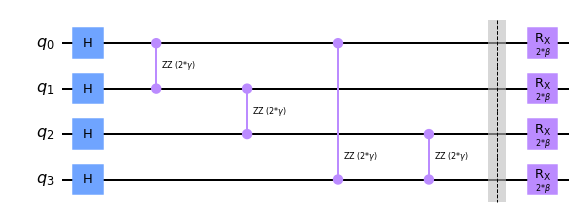

In [33]:
qc = QuantumCircuit(n)
qc.append(qc_0, range(n))
qc.append(qc_p, range(n))
qc.append(qc_mix, range(n))
qc.decompose().draw()